In [1]:
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt
import math 
from scipy import stats
import warnings

warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df = pd.read_excel("Labor_safety.xlsx")
df

,date,Employee_position,Financial_loss,currency,Financial_loss_In_Gel,Area_of_risk,Area_of_risk_2,impact_score,severity_impact,probability_score,probability,risk_score,Risk_level,coment
0,2021-04-01,მბრიზგავი,30000,GEL,30000,helth,safety,4,მძიმე,2,ნაკლებად სავარაუდო,8,საშუალო(M),ჯანაშიას მოხვდა ბრიზგის შლანგი
1,2021-09-01,ამწეს ოპერატორი,1000,GEL,1000,social,safety,5,ფატალური,1,იშვიათი,5,საშუალო(M),"ამწე გადავარდა გზიდან, დაზიანდა დომენტი ტეფნაძ..."
2,2021-12-16,სიმაღლეზე მომუშავე,150000,GEL,150000,helth,safety,5,ფატალური,1,იშვიათი,5,საშუალო(M),"ადამიანის სიკვდილი, ხარაჩო მოხვდა თავში, რემენ..."
3,2022-02-01,მეარმატურე,0,GEL,0,helth,safety,3,საშუალოსიმძიმე,2,ნაკლებად სავარაუდო,6,საშუალო(M),"ქელლე დაიმტვრა, ჯართის მოპარვის დროს"
4,2022-03-01,მქსოველი,500,GEL,500,social,envoiroment,2,ნაკლებადმნიშვნელოვანი,2,ნაკლებად სავარაუდო,4,დაბალი(L),"ბეტონის ქარხანამ გაჟონა, დაიტბორა კერძო პირის ..."
5,2022-04-01,მქსოველი,0,GEL,0,helth,safety,1,უმნიშვნელო,2,ნაკლებად სავარაუდო,2,დაბალი(L),არმატურა მოხვდა
6,2022-04-01,truck driver,1000,GEL,1000,safety,safety,1,უმნიშვნელო,1,იშვიათი,1,დაბალი(L),ორი თვეთმცლელი დაეჯახა ერთმანეთს
7,2022-04-01,მქსოველი,200,GEL,200,safety,helth,2,ნაკლებადმნიშვნელოვანი,2,ნაკლებად სავარაუდო,4,დაბალი(L),ყური დაუზიანა არმატურამ
8,2022-05-01,truck driver,35000,USD,91000,safety,envoironment,1,უმნიშვნელო,2,ნაკლებად სავარაუდო,2,დაბალი(L),მძღოლი მოძრაობდა დიდი სიჩქარით
9,2022-05-01,მბრიზგავი,300,GEL,300,helth,safety,2,ნაკლებადმნიშვნელოვანი,2,ნაკლებად სავარაუდო,4,დაბალი(L),ბრიზგის შლანგი მოხვდა


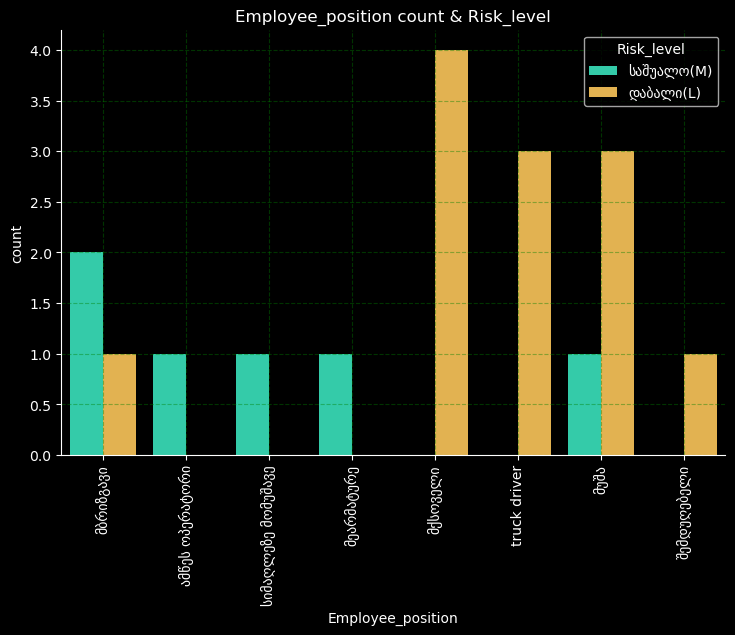

In [3]:
plt.style.use('dark_background')

sns.catplot(data = df, x = 'Employee_position',kind = 'count',hue = 'Risk_level',
            palette = 'turbo',aspect=1.5, legend_out=False)

plt.tick_params(axis='x', rotation=90)
plt.title("Employee_position count & Risk_level")
plt.grid(alpha = 0.4, color = 'g',linestyle='--')

plt.show()

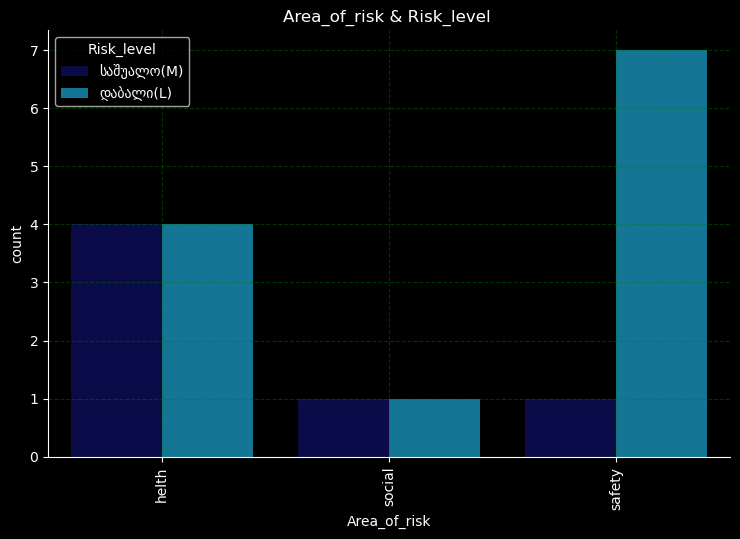

In [4]:
sns.catplot(data = df, x = 'Area_of_risk',kind = 'count',hue = 'Risk_level',
            palette = 'ocean',aspect=1.5, legend_out=False)

plt.tick_params(axis='x', rotation=90)
plt.title("Area_of_risk & Risk_level ")
plt.grid(alpha = 0.4, color = 'g',linestyle='--')

plt.show()

In [5]:
emp_rs_mean = df.groupby("Employee_position").\
    agg({'risk_score': ['count','mean']}).reset_index()


emp_rs_mean.columns =['_'.join(col).strip()for col in emp_rs_mean.columns.values]

emp_rs_mean.sort_values('risk_score_mean',ascending=False, inplace=True)

emp_rs_mean

,Employee_position_,risk_score_count,risk_score_mean
2,მბრიზგავი,3,6.000000
3,მეარმატურე,1,6.000000
1,ამწეს ოპერატორი,1,5.000000
6,სიმაღლეზე მომუშავე,1,5.000000
4,მუშა,4,4.000000
5,მქსოველი,4,3.000000
7,შემდუღებელი,1,2.000000
0,truck driver,3,1.333333


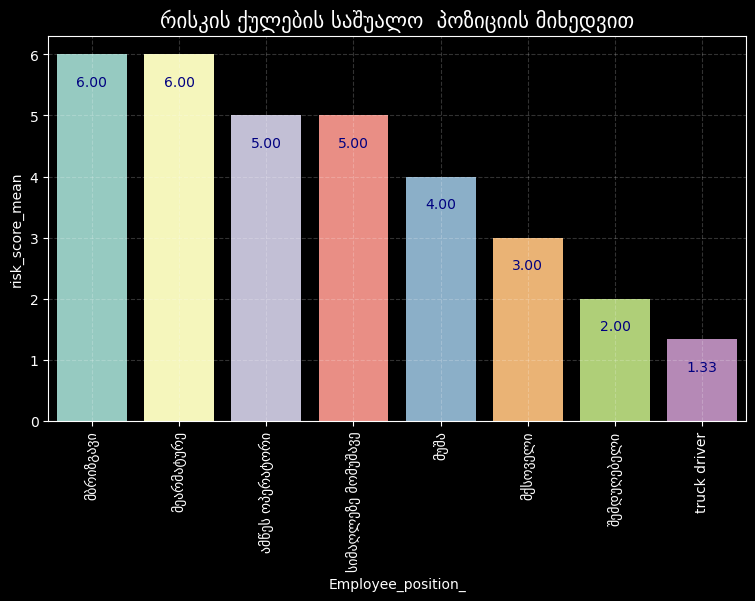

In [6]:
plt.figure(figsize=(9,5))

plots = sns.barplot(x = emp_rs_mean["Employee_position_"], y= emp_rs_mean["risk_score_mean"])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 10, xytext=(0, -20),color = "navy",
                   textcoords='offset points')
    
plt.grid(alpha = 0.2, linestyle='--')

plt.tick_params(axis='x', rotation=90)
plt.title("რისკის ქულების საშუალო  პოზიციის მიხედვით",size = 15)

plt.show()

In [7]:
area_rs_mean = df.groupby("Area_of_risk").\
    agg({'risk_score': ['count','mean']}).reset_index()


area_rs_mean.columns =['_'.join(col).strip()for col in area_rs_mean.columns.values]

area_rs_mean.sort_values('risk_score_mean',ascending=False, inplace=True)

area_rs_mean

,Area_of_risk_,risk_score_count,risk_score_mean
0,helth,8,4.875
2,social,2,4.500
1,safety,8,2.500


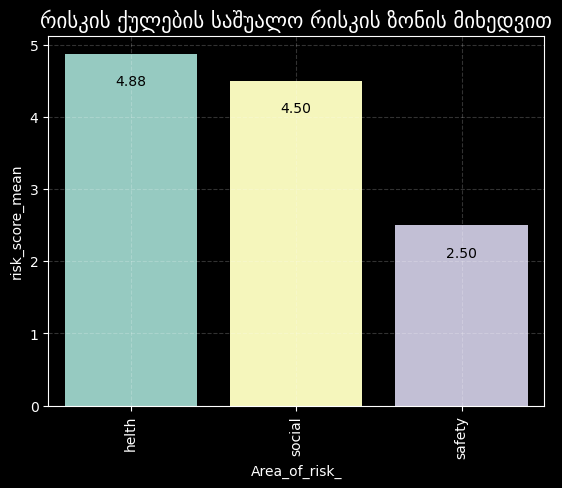

In [8]:
plots = sns.barplot(x = area_rs_mean["Area_of_risk_"], y= area_rs_mean["risk_score_mean"])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 10, xytext=(0, -20),color = "black",
                   textcoords='offset points')
    
plt.grid(alpha = 0.2, linestyle='--')

plt.tick_params(axis='x', rotation=90)
plt.title("რისკის ქულების საშუალო რისკის ზონის მიხედვით",size = 15)

plt.show()

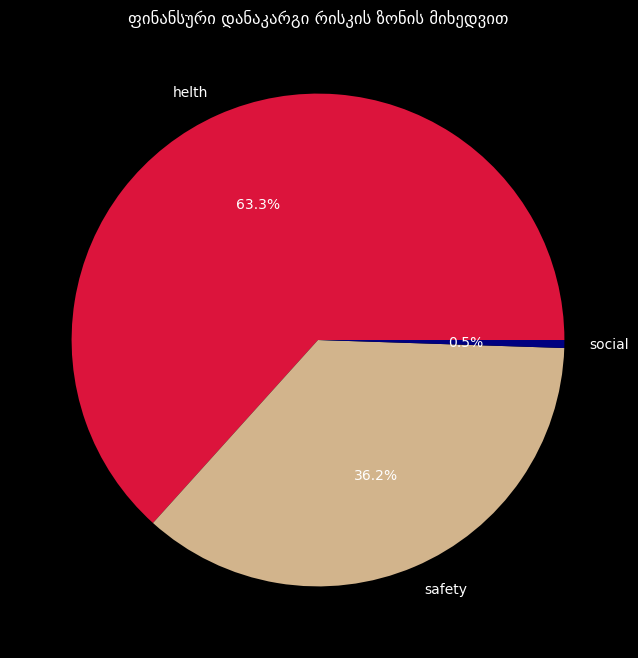

In [9]:
plt.figure(figsize=(8,8))

color = ["crimson",'tan','navy','darkorange','limegreen','teal','orchid',
        'r','gold','b','crimson','slategrey','tan','pink','y']


df.groupby('Area_of_risk')['Financial_loss_In_Gel'].sum().\
    sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%',colors = color)
                                                                     

plt.title("ფინანსური დანაკარგი რისკის ზონის მიხედვით")
plt.ylabel(None)
plt.show()

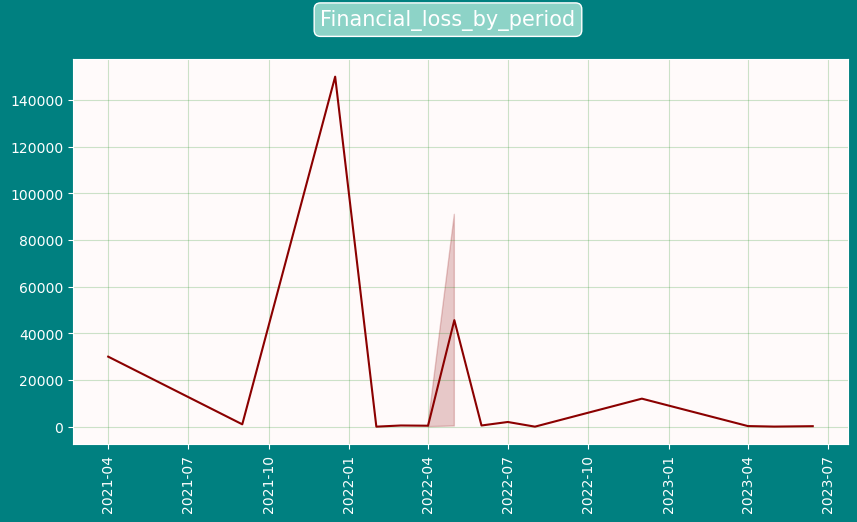

In [10]:
fig = plt.figure(figsize = (10,5))
fig.set(facecolor = "teal")

sns.lineplot(x = df.date , y = df.Financial_loss_In_Gel,color = "darkred").set(facecolor = "snow")

plt.grid(color = "g", linestyle = "-",alpha = 0.2)

fig.suptitle("Financial_loss_by_period",fontsize = 15, bbox  = {"boxstyle": "round"})
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='x', rotation=90)  

plt.show()

In [11]:
t =df.pivot_table(index='Area_of_risk',columns='Risk_level',values ='risk_score',
              aggfunc=['mean'])

t

mean           
Risk_level   დაბალი(L) საშუალო(M)
Area_of_risk                     
helth              3.0       6.75
safety             2.0       6.00
social             4.0       5.00

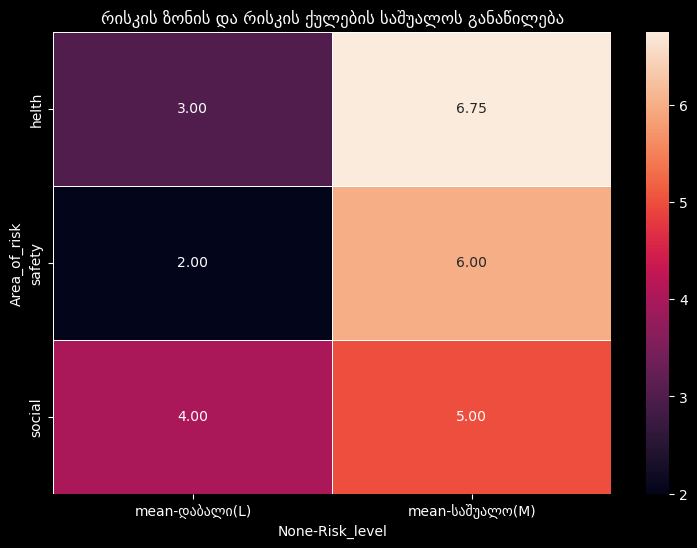

In [12]:
plt.subplots(figsize=(9,6))

sns.heatmap(t,annot = True , linewidths=0.7, fmt = '.2f')

plt.title("რისკის ზონის და რისკის ქულების საშუალოს განაწილება")

plt.show()

In [13]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [14]:
phik_overview = df.phik_matrix().copy()

interval columns not set, guessing: ['Financial_loss', 'Financial_loss_In_Gel', 'impact_score', 'probability_score', 'risk_score']


In [15]:
phik_overview

,date,Employee_position,Financial_loss,currency,Financial_loss_In_Gel,Area_of_risk,Area_of_risk_2,impact_score,severity_impact,probability_score,probability,risk_score,Risk_level,coment
date,1.000000,0.900135,0.801251,0.0,0.801251,0.828249,0.539893,0.875422,0.875422,0.000000,0.000000,0.673712,0.890375,1.0
Employee_position,0.900135,1.000000,0.806383,0.0,0.806383,0.550432,0.000000,0.846336,0.846336,0.478608,0.478608,0.671032,0.828495,1.0
Financial_loss,0.801251,0.806383,1.000000,1.0,1.000000,0.000000,0.831093,0.379053,0.379053,0.000000,0.000000,0.458647,0.509938,1.0
currency,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
Financial_loss_In_Gel,0.801251,0.806383,1.000000,1.0,1.000000,0.000000,0.831093,0.379053,0.379053,0.000000,0.000000,0.458647,0.509938,1.0
Area_of_risk,0.828249,0.550432,0.000000,0.0,0.000000,1.000000,0.641244,0.446219,0.446219,0.000000,0.000000,0.495414,0.136446,1.0
Area_of_risk_2,0.539893,0.000000,0.831093,1.0,0.831093,0.641244,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
impact_score,0.875422,0.846336,0.379053,0.0,0.379053,0.446219,0.000000,1.000000,1.000000,0.000000,0.000000,0.813869,0.591933,1.0
severity_impact,0.875422,0.846336,0.379053,0.0,0.379053,0.446219,0.000000,1.000000,1.000000,0.000000,0.000000,0.813869,0.591933,1.0
probability_score,0.000000,0.478608,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.813919,0.075392,1.0


𝑃ℎ𝑖_𝐾  არის ახალი და პრაქტიკული კორელაციის კოეფიციენტი, რომლის კომბინირებული მახასიათებლები ქმნის უპირატესობას არსებულ პირსონის კლასიკურ კოეფიციენტთან შედარებით, რომელიც სასარგებლოა მხოლოდ რაოდენობრივი ტიპის ცვლადებისა და ცვლადებს შორის წრფივი დამოკიდებულების კავშირის შემოწმების დროს.
Phi_K მუშაობს როგორც რაოდენობრივ, ასევე კატეგორიალურ და ინტერვალურ ცვლადებს შორის. ასახავს არაწრფივ დამოკიდებულებას და უბრუნდება პირსონის კორელაციის კოეფიციენტს ბივარიაციული ნორმალური განაწილების შემთხვევაში.
ამიტომ აღნიშნული სასარგებლო თვისებების გამო იგი გამოიყენება შერეული ტიპის ცვლადების და არაწრფივი დამოკიდებულების დროსაც.

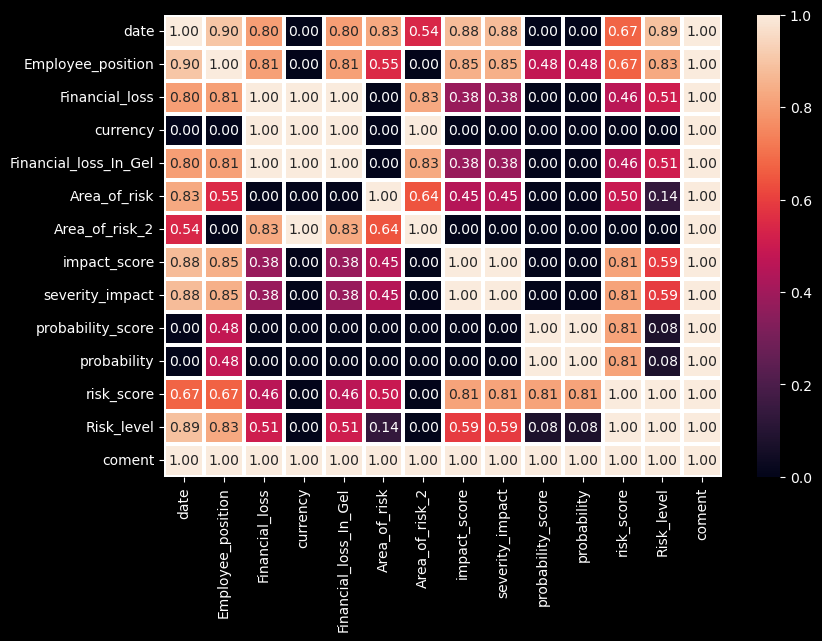

In [16]:
f,ax = plt.subplots(figsize=(9,6))

sns.heatmap(phik_overview, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()